<h1 style='color:red'> Logistic Regression

## Hand Calcs

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn

In [2]:
sugar_level = 240
prob_diabetes = 1/(1+np.exp(-(-15 + 0.065*sugar_level)))
print (prob_diabetes)

0.6456563062257958


In [3]:
np.exp(1)

2.718281828459045

## Diabetes dataset - basics

In [4]:
df = pd.read_csv('Diabetes Example Data.csv')
df

,Blood Sugar Level,Diabetes
0,190,No
1,240,Yes
2,300,Yes
3,160,No
4,200,Yes
5,269,Yes
6,129,No
7,141,No
8,220,No
9,337,Yes


In [5]:
df['Diabetes'] = df['Diabetes'].map({'No':0, 'Yes':1})

In [6]:
df.sort_values(by='Blood Sugar Level', inplace=True)
df

,Blood Sugar Level,Diabetes
6,129,0
7,141,0
3,160,0
0,190,0
4,200,1
8,220,0
1,240,1
5,269,1
2,300,1
9,337,1


In [7]:
# X & y
X = df['Blood Sugar Level']
y = df['Diabetes']
X_sm = sm.add_constant(X)

In [8]:
lm1 = sm.GLM(y,X_sm,family = sm.families.Binomial())
log_model1 = lm1.fit()
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                   10
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5838
Date:                Mon, 08 Feb 2021   Deviance:                       5.1676
Time:                        12:53:17   Pearson chi2:                     4.32
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -13.5243      9.358     -1.445      0.148     -31.866       4.817
Blood Sugar Level     0.0637      0.044      1.439      0.150      -0.023       0.150
=====================================================================================
"""

In [9]:
beta0 = log_model1.params[0]
beta1 = log_model1.params[1]

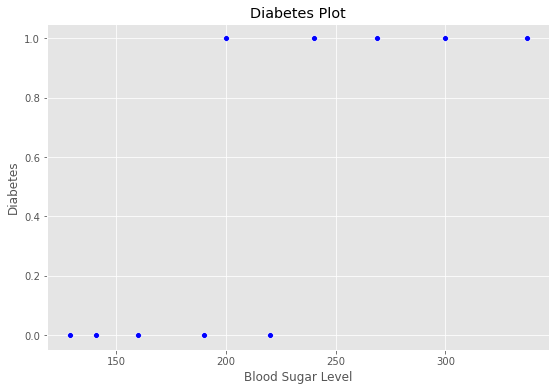

In [10]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.scatterplot(data=df, x='Blood Sugar Level', y='Diabetes', color='b')
plt.title('Diabetes Plot')
plt.show()

In [11]:
P = 1 / (1 + (np.exp(-(-13.52*X_sm['const'] + 0.063*X_sm['Blood Sugar Level']))))
one_minus_P = np.exp(-(-beta0 + beta1*X))/(1+np.exp(-(-beta0 + beta1*X)))

In [12]:
P

6    0.004528
7    0.009594
3    0.031068
0    0.175086
4    0.284958
8    0.584191
1    0.832018
5    0.968538
2    0.995413
9    0.999552
dtype: float64

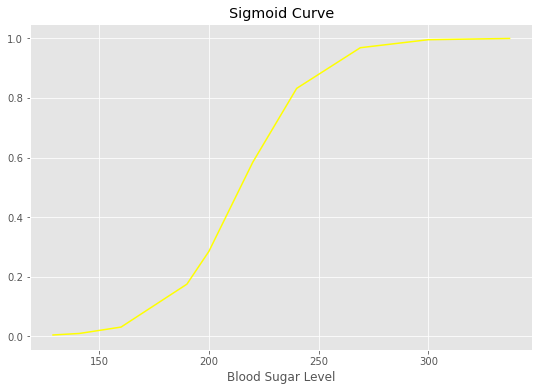

In [13]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=X, y=P, color='yellow')
plt.title('Sigmoid Curve')
plt.show()

In [14]:
y_predy = log_model1.predict(X_sm)
y_predy

6    0.004928
7    0.010524
3    0.034445
0    0.194265
4    0.313116
8    0.619701
1    0.853479
5    0.973642
2    0.996256
9    0.999644
dtype: float64

In [15]:
# df is the input data frame
df_new = df.copy(deep=True)
df_new['y_pred'] = log_model1.predict(X_sm)
df_new['P_calc'] = 1 / (1 + (np.exp(-(-13.52*X_sm['const'] + 0.063*X_sm['Blood Sugar Level']))))
df_new['Odds'] = df_new['P_calc'] / (1-df_new['P_calc'])
df_new['Log Odds'] = np.log(df_new['Odds'])
df_new

,Blood Sugar Level,Diabetes,y_pred,P_calc,Odds,Log Odds
6,129,0,0.004928,0.004528,0.004548,-5.393
7,141,0,0.010524,0.009594,0.009687,-4.637
3,160,0,0.034445,0.031068,0.032065,-3.440
0,190,0,0.194265,0.175086,0.212248,-1.550
4,200,1,0.313116,0.284958,0.398519,-0.920
8,220,0,0.619701,0.584191,1.404948,0.340
1,240,1,0.853479,0.832018,4.953032,1.600
5,269,1,0.973642,0.968538,30.784152,3.427
2,300,1,0.996256,0.995413,217.022275,5.380
9,337,1,0.999644,0.999552,2232.773916,7.711


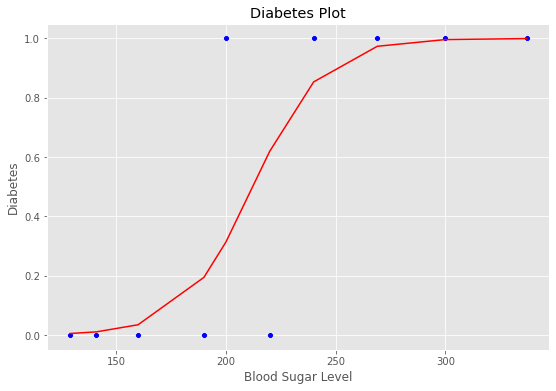

In [16]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.scatterplot(data=df, x='Blood Sugar Level', y='Diabetes', color='b')
sns.lineplot(x=df['Blood Sugar Level'], y=y_predy, color='r')
plt.title('Diabetes Plot')
plt.show()

In [17]:
# ln (P/(1-P))

beta0 + beta1*X

6   -5.307840
7   -4.543516
3   -3.333338
0   -1.422529
4   -0.785593
8    0.488279
1    1.762152
5    3.609267
2    5.583769
9    7.940433
Name: Blood Sugar Level, dtype: float64

In [18]:
P/(one_minus_P)

6    1.252523e+07
7    5.699514e+07
3    6.190732e+08
0    2.357912e+10
4    7.255613e+10
8    5.317208e+11
1    2.707059e+12
5    1.998358e+13
2    1.479366e+14
9    1.568064e+15
dtype: float64

In [19]:
one_minus_P

6    3.614876e-10
7    1.683263e-10
3    5.018548e-11
0    7.425479e-12
4    3.927413e-12
8    1.098679e-12
1    3.073514e-13
5    4.846668e-14
2    6.728650e-15
9    6.374437e-16
Name: Blood Sugar Level, dtype: float64

In [20]:
beta0 + beta1*220

0.48827939697318

In [21]:
-13.5 + 0.06*220

-0.3000000000000007

In [22]:
beta0 + beta1*220

0.48827939697318

In [23]:
-13.5 + 0.06*231.5

0.3899999999999988

In [24]:
beta0 + beta1*231.5

1.2207560028161346

In [25]:
beta0

-13.52431654089204

In [26]:
beta1*231.5

14.745072543708174

In [27]:
-13.5 + 0.06*X

6   -5.76
7   -5.04
3   -3.90
0   -2.10
4   -1.50
8   -0.30
1    0.90
5    2.64
2    4.50
9    6.72
Name: Blood Sugar Level, dtype: float64

In [28]:
-13.5 + 0.06*243

1.08

In [29]:
P

6    0.004528
7    0.009594
3    0.031068
0    0.175086
4    0.284958
8    0.584191
1    0.832018
5    0.968538
2    0.995413
9    0.999552
dtype: float64

In [30]:
P_new = 1/(1+np.exp(-(-13.52 + 0.063*X)))
P_new

6    0.004528
7    0.009594
3    0.031068
0    0.175086
4    0.284958
8    0.584191
1    0.832018
5    0.968538
2    0.995413
9    0.999552
Name: Blood Sugar Level, dtype: float64

In [31]:
Odds_new = P_new/(1-P_new)

In [32]:
Odds_new

6       0.004548
7       0.009687
3       0.032065
0       0.212248
4       0.398519
8       1.404948
1       4.953032
5      30.784152
2     217.022275
9    2232.773916
Name: Blood Sugar Level, dtype: float64

In [33]:
log_odds_new = np.log(Odds_new)

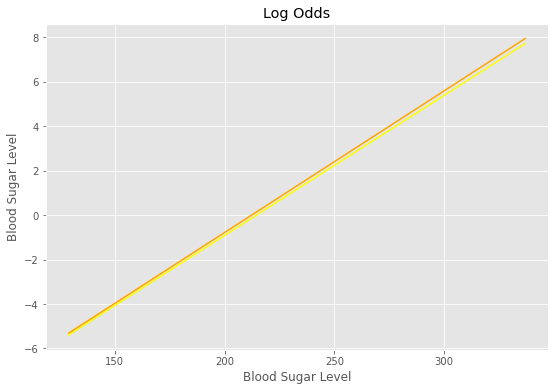

In [34]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=X, y=log_odds_new, color='yellow')
sns.lineplot(x=X, y=beta0 + beta1*X, color='orange')
plt.title('Log Odds')
plt.show()

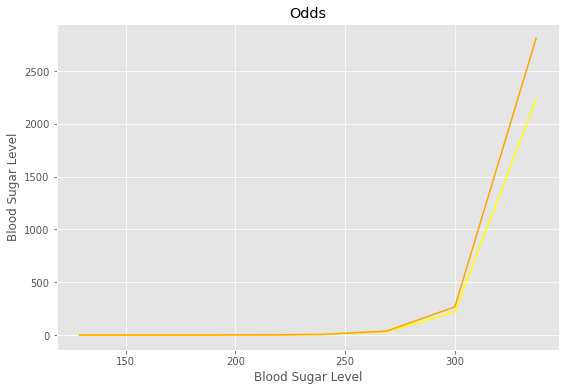

In [35]:
plt.figure(figsize=(9,6))
plt.style.use('ggplot')
sns.lineplot(x=X, y=Odds_new, color='yellow')
sns.lineplot(x=X, y=np.exp(beta0 + beta1*X), color='orange')
plt.title('Odds')
plt.show()

# Telecom Churn Dataset

In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm, sklearn

## Step-1: Data Understanding & Preparation

In [37]:
churn = pd.read_csv('churn_data.csv')
inet = pd.read_csv('internet_data.csv')
cust = pd.read_csv('customer_data.csv')

In [38]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
inet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [40]:
cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [41]:
print (churn.shape, inet.shape, cust.shape)

(7043, 9) (7043, 9) (7043, 5)


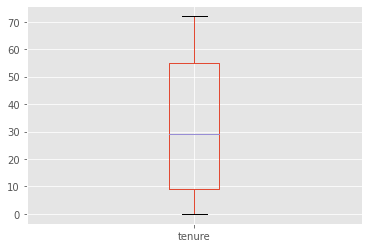

In [42]:
churn.tenure.plot.box()

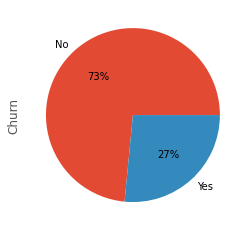

In [43]:
churn.Churn.value_counts().plot.pie(autopct='%1.0f%%')

In [44]:
# Merge Data frames
df_temp = pd.merge(cust, churn, how='inner', on='customerID')
telecom = pd.merge(df_temp, inet, how= 'inner', on='customerID')

In [45]:
telecom.shape

(7043, 21)

In [46]:
pd.set_option("display.max_columns", 500)
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No


In [47]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [48]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [49]:
# Convert Yes to 1 and No to 0

varList = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

telecom[varList] = telecom[varList].apply(binary_map)

In [50]:
telecom.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No


In [51]:
# Create Dummy Variables Part1
dumList_1 = ['gender','Contract','PaymentMethod','InternetService']
dummy_1 = pd.get_dummies(telecom[dumList_1], drop_first=True)
telecom = pd.concat([telecom,dummy_1],axis=1)
telecom.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,0,1,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,1,0,0


In [52]:
# Creating Dummy Variables Part2
dumList_2 = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for item in dumList_2:
    dummy_2 = pd.get_dummies(telecom[item], prefix=item)
    if item == 'MultipleLines':
        str1 = item + '_No phone service'
    else:
        str1 = item + '_No internet service'
    dummy_2 = dummy_2.drop([str1], 1)
    telecom = pd.concat([telecom,dummy_2], axis=1)
telecom.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,One year,0,Mailed check,56.95,1889.5,0,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0


In [53]:
# Dropping parent categorical variables since they are created to dummy variables
varList_drop = dumList_1 + dumList_2
telecom.drop(columns=varList_drop, inplace=True)

In [54]:
# convert TotalCharges
print (pd.to_numeric(telecom['TotalCharges'], errors='coerce').isna().sum()) #  Check how many NA are there
print (telecom[telecom['TotalCharges'] == ' ']['TotalCharges'].count()) #   Check how many blank strings are there
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce') # Coerce them
print (telecom['TotalCharges'].isna().sum())

11
11
11


In [55]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  gender_Male                            7043 non-null   uint8  
 11  Cont

In [56]:
# Fucking upgrad
inet['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [57]:
inet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [58]:
# Check the numerical variables
num_telecom = telecom[['tenure','MonthlyCharges','TotalCharges']]
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


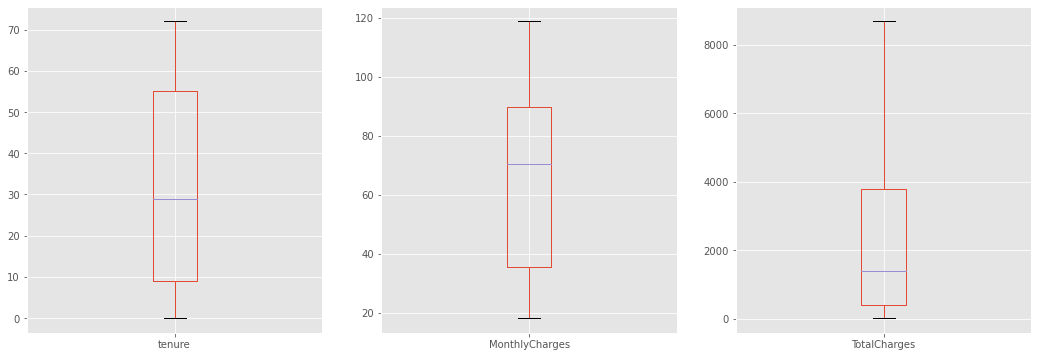

In [59]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
num_telecom.tenure.plot.box()

plt.subplot(1,3,2)
num_telecom.MonthlyCharges.plot.box()

plt.subplot(1,3,3)
num_telecom.TotalCharges.plot.box()
plt.show()

In [60]:
# DRop rows with 0.0 in TotalCharges 
telecom = telecom[~np.isnan(telecom['TotalCharges'])]
telecom.isna().sum()

customerID                               0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [61]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  gender_Male                            7032 non-null   uint8  
 11  Cont

In [62]:
telecom.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [63]:
telecom.shape

(7032, 32)

Now all the data is handled and it is a clean numeric dataframe except the customer ID of course

## Step-2: Prepare for modeling

In [64]:
# Test Train split
from sklearn.model_selection import train_test_split
X = telecom.drop(['customerID', 'Churn'],axis=1)
y = telecom['Churn']

In [65]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [66]:
X.shape

(7032, 30)

In [67]:
y.shape

(7032,)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

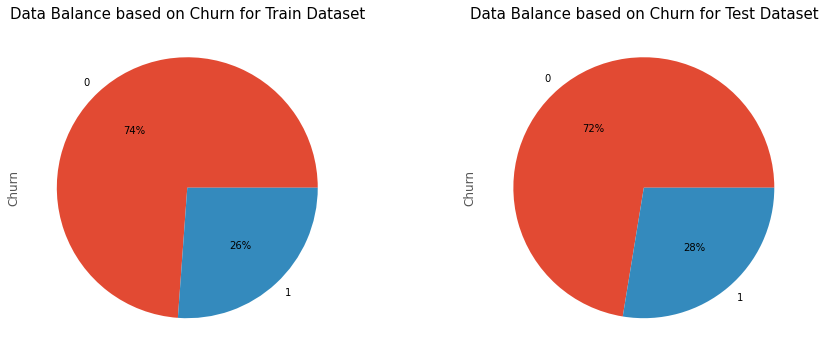

In [69]:
# Lets check if the split has balanced yr
plt.figure(figsize=[15,6])
plt.style.use('ggplot')

plt.subplot(1,2,1)
y_train.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Data Balance based on Churn for Train Dataset', fontdict={'fontsize':15, 'color':'black'})

plt.subplot(1,2,2)
y_test.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Data Balance based on Churn for Test Dataset', fontdict={'fontsize':15, 'color':'black'})
plt.show()

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges','TotalCharges']])
X_train.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0


In [71]:
round(telecom.Churn.value_counts(normalize=True)*100,2)

0    73.42
1    26.58
Name: Churn, dtype: float64

We almost have 27% churn rate

In [72]:
# Check correlations amongst yes no features of a set of dummy variables
dumList_2_no = [item +'_No' for item in dumList_2]
dumList_2_yes = [item +'_Yes' for item in dumList_2]
dumList_2_updated = dumList_2_no + dumList_2_yes

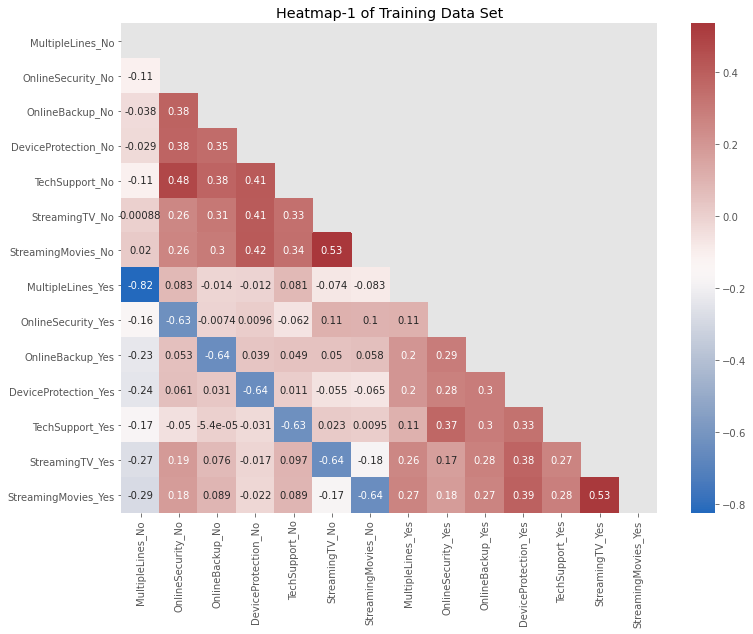

In [73]:
# Heatmap of Training Dataset for easy reference
plt.figure(figsize = (12,9))
mask1 = np.zeros_like(X_train[dumList_2_updated].corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(X_train[dumList_2_updated].corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap-1 of Training Data Set')
plt.show()

In [74]:
# Drop all No's
print (X_train.shape, X_test.shape)
X_train.drop(columns=dumList_2_no, inplace=True)
X_test.drop(columns=dumList_2_no, inplace=True)
print (X_train.shape, X_test.shape)

(4922, 30) (2110, 30)
(4922, 23) (2110, 23)


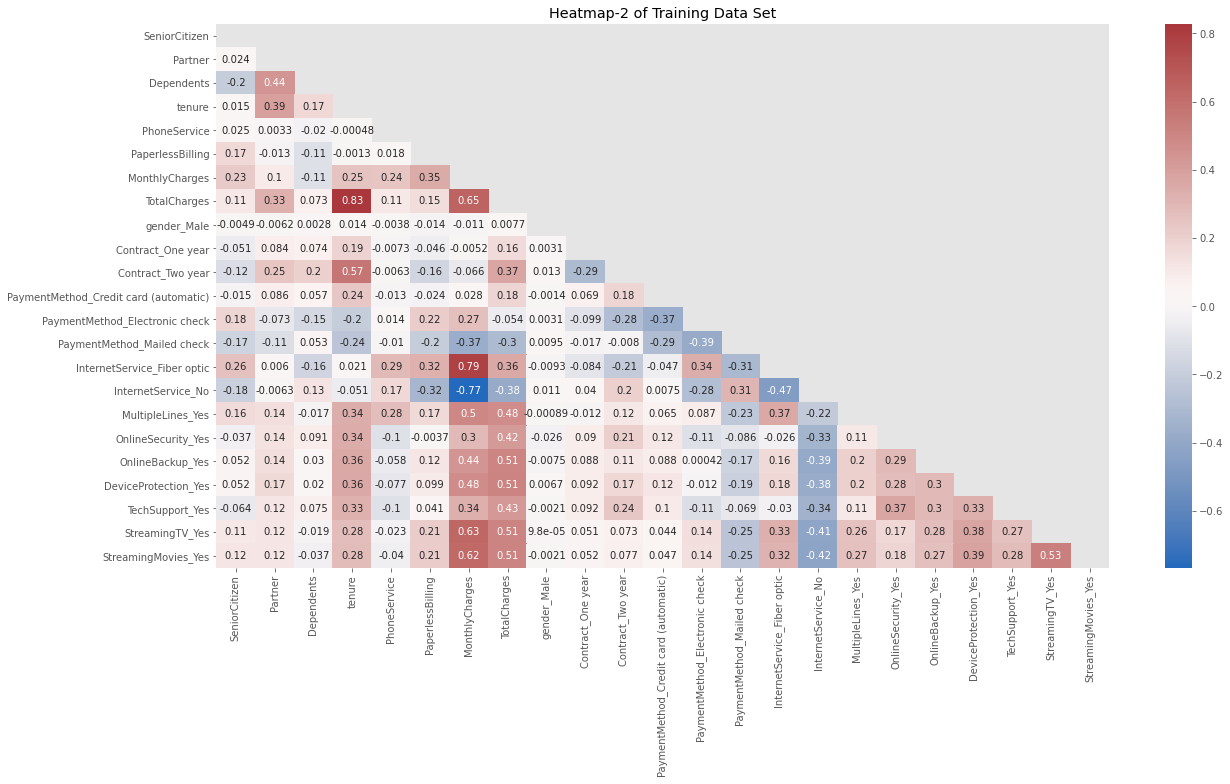

In [75]:
# Heatmap of Training Dataset for easy reference
plt.figure(figsize = (20,10))
mask1 = np.zeros_like(X_train.corr()) # Makes a NP array of 0 with size like the matrix supplied with
mask1[np.triu_indices_from(mask1)] = True # Makes the segment below the diagonal as 0 and rest as 1
sns.heatmap(X_train.corr(), mask= mask1, annot=True, cmap= 'vlag')
plt.title('Heatmap-2 of Training Data Set')
plt.show()

## Model-1 : All Variables

In [76]:
# GLM model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm1_model = logm1.fit()
logm1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 08 Feb 2021   Deviance:                       4009.4
Time:                        12:53:30   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [77]:
# Check without standardization
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print (X_train_2.shape, X_test_2.shape)
X_train_2.drop(columns=dumList_2_no, inplace=True)
X_test_2.drop(columns=dumList_2_no, inplace=True)
print (X_train_2.shape, X_test_2.shape)
# GLM model
import statsmodels.api as sm
X_train_2_sm = sm.add_constant(X_train_2)
logm1_2 = sm.GLM(y_train_2, X_train_2_sm, family= sm.families.Binomial())
logm1_2_model = logm1_2.fit()
logm1_2_model.summary()

(4922, 30) (2110, 30)
(4922, 23) (2110, 23)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 08 Feb 2021   Deviance:                       4009.4
Time:                        12:53:30   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.0343      0.993      2.049      0.040       0.089       3.980
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
tenure                                   -0.0619      0.008     -8.015      0.000      -0.077      -0.047
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -0.0725      0.039     -1.880      0.060      -0.148       0.003
TotalCharges                              0.0003   8.73e-05      3.705      0.000       0.000       0.000
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## Model-2: RFE

In [78]:
# RFE with Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe_obj = RFE(logreg, 15)
rfe_res = rfe_obj.fit(X_train, y_train)
list_rfe = list(zip(X_train.columns, rfe_res.support_, rfe_res.ranking_))
col_rfe = X_train.columns[rfe_res.support_]
dropped_by_rfe = X_train.columns[~rfe_res.support_]

In [79]:
list_rfe

[('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 8),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [80]:
len(list_rfe)

23

In [81]:
dropped_by_rfe

Index(['Partner', 'Dependents', 'PhoneService', 'gender_Male',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [82]:
col_rfe

Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [83]:
# Statsmodels
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm2_model = logm2.fit()
logm2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Mon, 08 Feb 2021   Deviance:                       4022.2
Time:                        12:53:31   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [84]:
# Predict y
y_train_pred = logm2_model.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [85]:
# Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [86]:
# Put these values in a dataframe
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn Prob,CustID
0,0,0.192642,879
1,0,0.275624,5790
2,1,0.599507,6498
3,1,0.513571,880
4,1,0.648233,2784


In [87]:
# Create a new column with predicted
cut_off = 0.5
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

In [88]:
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.192642,879,0
1,0,0.275624,5790,0
2,1,0.599507,6498,1
3,1,0.513571,880,1
4,1,0.648233,2784,1


In [89]:
# print confusion matrix & accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
print (confusion)
print (round(accuracy*100,2))

[[3275  360]
 [ 574  713]]
81.02


In [90]:
# Predicted     not_churn    churn
# Actual
# not_churn        3275      360
# churn            574       713 

In [91]:
# This is a custom function to calculate VIF
def calc_VIF(X_train):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df_vif = pd.DataFrame()
    df_vif['Features'] = X_train.columns
    df_vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    df_vif['VIF'] = round(df_vif['VIF'], 2)
    df_vif.sort_values(by='VIF', ascending=False, inplace=True)
    return df_vif

In [92]:
# Print VIF
vif=calc_VIF(X_train[col_rfe])
vif

,Features,VIF
3,MonthlyCharges,14.85
4,TotalCharges,10.42
1,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
2,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


## Model-3: RFE minus MonthlyCharges

In [93]:
# Drop MonthlyCharges
col = col_rfe.drop('MonthlyCharges',1)
len(col)

14

In [94]:
# Statsmodels
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm3_model = logm3.fit()
logm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Mon, 08 Feb 2021   Deviance:                       4046.2
Time:                        12:53:32   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [95]:
# Predict y
y_train_pred = logm3_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Create dataframe with Churn, Churn Prob and Cust ID
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index

# Create a new column with predicted
cut_off = 0.5
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.227902,879,0
1,0,0.228644,5790,0
2,1,0.674892,6498,1
3,1,0.615868,880,1
4,1,0.662260,2784,1


In [96]:
# print confusion matrix & accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
print (confusion)
print (round(accuracy*100,2))

[[3269  366]
 [ 590  697]]
80.58


In [97]:
# Print VIF
vif=calc_VIF(X_train[col])
vif

,Features,VIF
3,TotalCharges,7.46
1,tenure,6.90
5,Contract_Two year,3.07
8,InternetService_Fiber optic,2.96
13,StreamingMovies_Yes,2.62
12,StreamingTV_Yes,2.59
2,PaperlessBilling,2.55
9,InternetService_No,2.44
10,MultipleLines_Yes,2.27
11,TechSupport_Yes,1.95


## Model-4: RFE minus MonthlyCharges, TotalCharges

In [98]:
# Drop MonthlyCharges
col = col_rfe.drop(['TotalCharges','MonthlyCharges'],1)
len(col)

13

In [99]:
# Statsmodels
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
logm4_model = logm4.fit()
logm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Mon, 08 Feb 2021   Deviance:                       4051.9
Time:                        12:53:32   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [100]:
# Predict y
y_train_pred = logm4_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Create dataframe with Churn, Churn Prob and Cust ID
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index

# Create a new column with predicted
cut_off = 0.5
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [101]:
# print confusion matrix & accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
print (confusion)
print (round(accuracy*100,2))

[[3278  357]
 [ 597  690]]
80.62


In [102]:
# Print VIF
vif=calc_VIF(X_train[col])
vif

,Features,VIF
4,Contract_Two year,2.98
7,InternetService_Fiber optic,2.67
12,StreamingMovies_Yes,2.54
11,StreamingTV_Yes,2.51
2,PaperlessBilling,2.45
9,MultipleLines_Yes,2.24
1,tenure,2.04
8,InternetService_No,2.03
10,TechSupport_Yes,1.92
3,Contract_One year,1.78


In [103]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [104]:
# Sensitivity
sensitivity = TP /float(TP+FN)
print (round(sensitivity*100,2))

53.61


In [105]:
# Specifcity
specificity = TN /float (TN+FP)
print (round(specificity*100,2))

90.18


In [106]:
# Accuracy
accuracy_val = (TN+TP) / float (TN+FP+FN+TP)
print (round(accuracy_val*100,2))

80.62


In [107]:
# False Positive Rate (basically 1-Specificity)
false_positive = FP /float(TN+FP)
print (round(false_positive*100,2))

9.82


In [108]:
# False Negative Rate (basically 1-Sensitivity)
false_negative = FN /float(TP+FN)
print (round(false_negative*100,2))

46.39


In [109]:
# Positive Predictive Value (basically precision)
positive_pred_val = TP /float(TP+FP)
print (round(positive_pred_val*100,2))

65.9


In [110]:
# Negative Predictive Value
negative_pred_val = TN /float(TN+FN)
print (round(negative_pred_val*100,2))

84.59


## ROC Curve

In [111]:
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


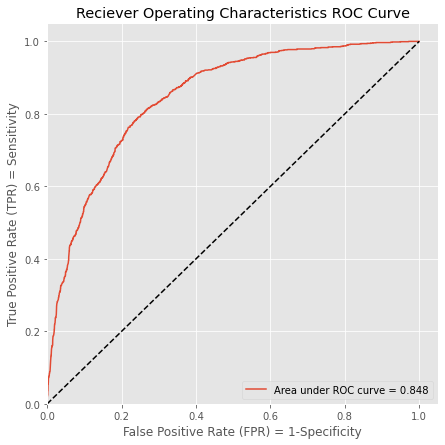

In [112]:
# ROC Curve
from sklearn import metrics
actual_classification = y_train_pred_final['Churn'] # Actual provided classification
predicted_probablity = y_train_pred_final['Churn Prob'] # Predicted Churn Probablity
fpr, tpr, thresholds = metrics.roc_curve(actual_classification, predicted_probablity,drop_intermediate = False)
auc_score = metrics.roc_auc_score(actual_classification,predicted_probablity)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='Area under ROC curve = %0.3f'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (FPR) = 1-Specificity')
plt.ylabel('True Positive Rate (TPR) = Sensitivity')
plt.title ('Reciever Operating Characteristics ROC Curve')
plt.show()

## Finding Optimal Cut off

In [113]:
# Dataframe by varying the cutoff values
num_range = np.linspace(0.0, 0.9, num=10)
y_train_pred_final_new = y_train_pred_final.copy(deep=True)
for i in num_range:
    y_train_pred_final_new[str(round(i,1))]= y_train_pred_final_new['Churn Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final_new.head()

,Churn,Churn Prob,CustID,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
4,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


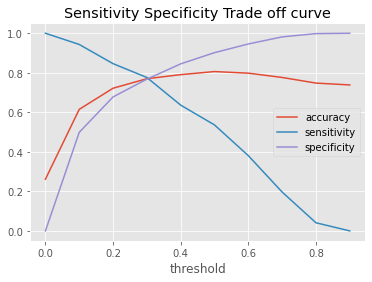

,threshold,accuracy,sensitivity,specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.614994,0.943279,0.498762
0.2,0.2,0.721861,0.846154,0.677854
0.3,0.3,0.770012,0.776224,0.767813
0.4,0.4,0.790532,0.636364,0.845117
0.5,0.5,0.806176,0.536131,0.901788
0.6,0.6,0.798050,0.380730,0.945805
0.7,0.7,0.776310,0.196581,0.981568
0.8,0.8,0.747867,0.041181,0.998074
0.9,0.9,0.738521,0.000000,1.000000


In [114]:
# Calculate accuracy, sensitivity and specificity for various cutoffs
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
for i in num_range:
    confusion = metrics.confusion_matrix(y_train_pred_final_new['Churn'],y_train_pred_final_new[str(round(i,1))])
    accuracy = metrics.accuracy_score(y_train_pred_final_new['Churn'],y_train_pred_final_new[str(round(i,1))])
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    sensitivity = TP /float(TP+FN)
    specificity = TN /float (TN+FP)
    cutoff_df.loc[str(round(i,1))] =[ i ,accuracy,sensitivity,specificity]

# Plot
cutoff_df.plot.line(x='threshold', y=['accuracy','sensitivity','specificity'])
plt.title ('Sensitivity Specificity Trade off curve')
plt.show()

cutoff_df

## Rerun with optimal cutoff 0.3

In [115]:
# Create a new column with predicted
cut_off = 0.3
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1


In [116]:
# print confusion matrix & accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
precision_sc = metrics.precision_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
recall_sc = metrics.recall_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
print ('Confusion Matrix = ')
print (confusion)
print ('Accuracy from sklearn Metrics = ',round(accuracy*100,2))
print ('Precision from sklearn Metrics = ',round(precision_sc*100,2))
print ('Recall from sklearn Metrics = ',round(recall_sc*100,2))
print ()
# Calculate Metrics Manually
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]
# Sensitivity
sensitivity = TP /float(TP+FN)
print ('Sensitivity =', round(sensitivity*100,2))
# Specifcity
specificity = TN /float (TN+FP)
print ('Specificity = ', round(specificity*100,2))
# Accuracy
accuracy_val = (TN+TP) / float (TN+FP+FN+TP)
print ('Accuracy = ', round(accuracy_val*100,2))
# TPR
true_positive = TP /float(TP+FN)
print ('TPR =', round(true_positive*100,2))
# False Positive Rate (basically 1-Specificity)
false_positive = FP /float(TN+FP)
print ('FPR = ', round(false_positive*100,2))
# False Negative Rate (basically 1-Sensitivity)
false_negative = FN /float(TP+FN)
#print ('FNR = ', round(false_negative*100,2))
# Positive Predictive Value (basically precision)
positive_pred_val = TP /float(TP+FP)
print ('Positive Predictive Value = ', round(positive_pred_val*100,2))
# Negative Predictive Value
negative_pred_val = TN /float(TN+FN)
print ('Negative Predictive Value = ', round(negative_pred_val*100,2))
# Precision
precision = TP/float(TP+FP)
print ('Precision = ', round(precision*100,2))
# Recall
recall = TP/float(TP+FN)
print ('Recall = ', round(recall*100,2))

Confusion Matrix = 
[[2791  844]
 [ 288  999]]
Accuracy from sklearn Metrics =  77.0
Precision from sklearn Metrics =  54.21
Recall from sklearn Metrics =  77.62

Sensitivity = 77.62
Specificity =  76.78
Accuracy =  77.0
TPR = 77.62
FPR =  23.22
Positive Predictive Value =  54.21
Negative Predictive Value =  90.65
Precision =  54.21
Recall =  77.62


## Precision Recall Tradeoff

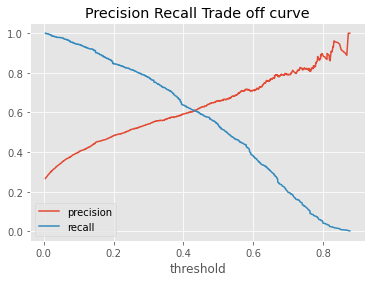

In [117]:
from sklearn.metrics import precision_recall_curve
prec, reca, threshold = precision_recall_curve(y_train_pred_final['Churn'],y_train_pred_final['Churn Prob'])
prec_reca_df = pd.DataFrame(columns = ['threshold','precision','recall'])
prec_reca_df.precision = prec[:-1]
prec_reca_df.recall = reca[:-1]
prec_reca_df.threshold = threshold
prec_reca_df.plot.line(x='threshold', y=['precision','recall',])
plt.title ('Precision Recall Trade off curve')
plt.show()

# Test Model Dataset

In [118]:
# Transform X_test
X_test[['tenure', 'MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges','TotalCharges']])

# Add constant
X_test_sm = sm.add_constant(X_test[col])

X_test_sm.head()

,const,SeniorCitizen,tenure,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,1.0,0,-0.347623,1,0,0,1,0,1,0,0,0,0,1
3730,1.0,0,0.999203,1,0,0,1,0,1,0,1,0,1,1
1761,1.0,0,1.040015,1,0,1,1,0,0,1,1,0,0,0
2283,1.0,0,-1.286319,1,0,0,0,1,1,0,0,0,0,0
1872,1.0,0,0.346196,0,0,1,0,0,0,1,0,0,0,0


In [119]:
# Predict y
y_test_pred = logm4_model.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)

# Create dataframe with Churn, Churn Prob and Cust ID
y_test_pred_final = pd.DataFrame({'Churn': y_test.values, 'Churn Prob': y_test_pred})
y_test_pred_final['CustID'] = y_test.index

# Create a new column with predicted
cut_off = 0.3
y_test_pred_final['Predicted_Churn'] = y_test_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_test_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.419725,942,1
1,1,0.260232,3730,0
2,0,0.008650,1761,0
3,1,0.592626,2283,1
4,0,0.013989,1872,0


In [120]:
# print confusion matrix & accuracy
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_pred_final['Churn'],y_test_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_test_pred_final['Churn'],y_test_pred_final['Predicted_Churn'])
precision_sc = metrics.precision_score(y_test_pred_final['Churn'],y_test_pred_final['Predicted_Churn'])
recall_sc = metrics.recall_score(y_test_pred_final['Churn'],y_test_pred_final['Predicted_Churn'])
print ('Confusion Matrix = ')
print (confusion)
print ('Shape: ', y_test_pred_final.shape)
print ()
print (round(y_test_pred_final['Churn'].value_counts(normalize=True)*100,2))
print ()
print ('Accuracy from sklearn Metrics = ',round(accuracy*100,2),'%')
print ('Precision from sklearn Metrics = ',round(precision_sc*100,2),'%')
print ('Recall from sklearn Metrics = ',round(recall_sc*100,2),'%')
print ()
# Calculate Metrics Manually
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]
# Sensitivity
sensitivity = TP /float(TP+FN)
print ('Sensitivity =', round(sensitivity*100,2),'%')
# Specifcity
specificity = TN /float (TN+FP)
print ('Specificity = ', round(specificity*100,2),'%')
# Accuracy
accuracy_val = (TN+TP) / float (TN+FP+FN+TP)
print ('Accuracy = ', round(accuracy_val*100,2),'%')
print ()
# TPR
true_positive = TP /float(TP+FN)
print ('TPR =', round(true_positive*100,2),'%')
# False Positive Rate (basically 1-Specificity)
false_positive = FP /float(TN+FP)
print ('FPR = ', round(false_positive*100,2),'%')
print ()
# False Negative Rate (basically 1-Sensitivity)
false_negative = FN /float(TP+FN)
#print ('FNR = ', round(false_negative*100,2))
# Positive Predictive Value (basically precision)
positive_pred_val = TP /float(TP+FP)
print ('Positive Predictive Value = ', round(positive_pred_val*100,2),'%')
# Negative Predictive Value
negative_pred_val = TN /float(TN+FN)
print ('Negative Predictive Value = ', round(negative_pred_val*100,2),'%')
print ()
# Precision
precision = TP/float(TP+FP)
print ('Precision = ', round(precision*100,2),'%')
# Recall
recall = TP/float(TP+FN)
print ('Recall = ', round(recall*100,2),'%')

Confusion Matrix = 
[[1144  384]
 [ 163  419]]
Shape:  (2110, 4)

0    72.42
1    27.58
Name: Churn, dtype: float64

Accuracy from sklearn Metrics =  74.08 %
Precision from sklearn Metrics =  52.18 %
Recall from sklearn Metrics =  71.99 %

Sensitivity = 71.99 %
Specificity =  74.87 %
Accuracy =  74.08 %

TPR = 71.99 %
FPR =  25.13 %

Positive Predictive Value =  52.18 %
Negative Predictive Value =  87.53 %

Precision =  52.18 %
Recall =  71.99 %


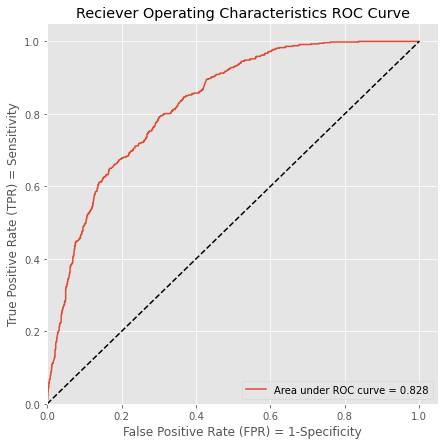

In [121]:
# ROC Curve
from sklearn import metrics
actual_classification = y_test_pred_final['Churn'] # Actual provided classification
predicted_probablity = y_test_pred_final['Churn Prob'] # Predicted Churn Probablity
fpr, tpr, thresholds = metrics.roc_curve(actual_classification, predicted_probablity,drop_intermediate = False)
auc_score = metrics.roc_auc_score(actual_classification,predicted_probablity)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label='Area under ROC curve = %0.3f'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (FPR) = 1-Specificity')
plt.ylabel('True Positive Rate (TPR) = Sensitivity')
plt.title ('Reciever Operating Characteristics ROC Curve')
plt.show()

Labels for confusion matrix

In [122]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
print (confusion)

[[2791  844]
 [ 288  999]]


In [123]:
print ('True Positive=', y_train_pred_final[y_train_pred_final['Churn'] == 1]['Predicted_Churn'].sum())
print ('False Positive=', y_train_pred_final[y_train_pred_final['Churn'] == 0]['Predicted_Churn'].sum())

True Positive= 999
False Positive= 844


In [124]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final['Churn'],y_train_pred_final['Predicted_Churn'])
df_confusion = pd.DataFrame(confusion, index=['true:not churn', 'true:churn'], columns=['pred:not churn', 'pred:churn'])
df_confusion

,pred:not churn,pred:churn
true:not churn,2791,844
true:churn,288,999


In [125]:
# Predict y
y_train_pred = logm4_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

# Create dataframe with Churn, Churn Prob and Cust ID
y_train_pred_final = pd.DataFrame({'Churn': y_train.values, 'Churn Prob': y_train_pred})
y_train_pred_final['CustID'] = y_train.index

# Create a new column with predicted
cut_off = 0.5
y_train_pred_final['Predicted_Churn'] = y_train_pred_final['Churn Prob'].apply(lambda x: 1 if x>cut_off else 0)

# Output the datafram head
y_train_pred_final.head()

,Churn,Churn Prob,CustID,Predicted_Churn
0,0,0.245817,879,0
1,0,0.265361,5790,0
2,1,0.669410,6498,1
3,1,0.630970,880,1
4,1,0.682916,2784,1
